In [1]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.multitest import multipletests
from utils import calc_power, calc_FDR

# Power analysis

C:\Users\admin2.EEM-642\anaconda3\envs\Shalev\lib\site-packages\numpy\core\fromnumeric.py:3256: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\admin2.EEM-642\anaconda3\envs\Shalev\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\admin2.EEM-642\anaconda3\envs\Shalev\lib\site-packages\numpy\core\_methods.py:216: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\admin2.EEM-642\anaconda3\envs\Shalev\lib\site-packages\numpy\core\_methods.py:185: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
C:\Users\admin2.EEM-642\anaconda3\envs\Shalev\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\admin2.EEM-642\anaconda3\envs\Shalev\lib\site-pack

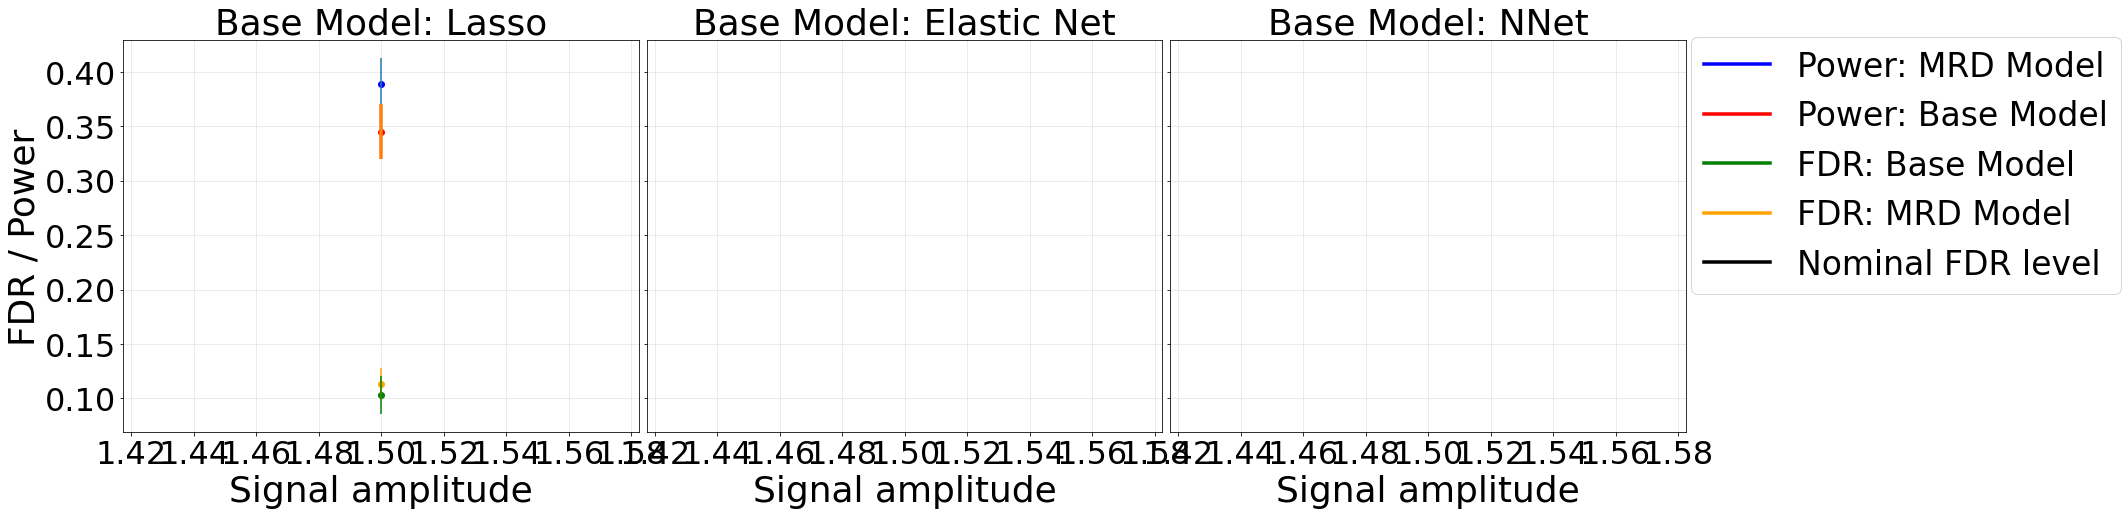

In [3]:
###################### Power to a constant target FDR level #################
from scipy.stats import sem
import pandas as pd
from os import listdir
from os.path import isfile, join
import ast
lw=3.5
th=0.2
fz=36
load = True
dcrt=False
cnt=0; cnt_t=0
thh=0.05
# load = False
is_NN = False #'''TODO: fill in whether you produced NN p-vals or not'''
if load:
    signal_strength=[]
    source = '''TODO: fill in the directory path of which the csvs are'''
    list_files = [join(source, f) for f in listdir(source) if isfile(join(source, f))]
    powers_0 = {}; powers_T = {}; powers_E = {}; powers_ET = {}; powers_NN = {}; powers_NN_T = {};
    fdrs_0 = {};fdrs_T = {};fdrs_E = {};fdrs_ET = {};fdrs_NN = {};fdrs_NN_T = {};
    for file in list_files:
        if not 'csv' in file:
            continue
        df = pd.read_csv(file)
        c= df['c'][0]
        if c not in powers_0.keys():
            signal_strength.append(c)
            powers_0[c]=[]; fdrs_0[c]=[]
            powers_T[c]=[]; fdrs_T[c]=[]
            powers_ET[c]=[]; fdrs_ET[c]=[]
            powers_E[c]=[]; fdrs_E[c]=[]
            powers_NN[c]=[]; fdrs_NN[c]=[]
            powers_NN_T[c]=[]; fdrs_NN_T[c]=[]
            powers_d[c]=[]; fdrs_d[c]=[]
        ones=df['ones'][0].replace('\n',',').replace('.',',').replace(',,',',')
        ones=np.array(ast.literal_eval(ones))
        if "NN" in file:
            if not is_NN:
              continue
            p_vals_NN = ast.literal_eval(df['p_vals_NN'][0])
            if p_vals_NN[1]<thh:
                cnt+=1
            disc,_,_,_=multipletests(np.array(p_vals_NN),alpha=th,method='fdr_bh')
            powers_NN[c].append(calc_power(disc,ones))
            fdrs_NN[c].append(calc_FDR(disc,ones))

            p_vals_NN_T = ast.literal_eval(df['p_vals_NN_T'][0])
            if p_vals_NN_T[1]<thh:
                cnt_t+=1
            disc,_,_,_=multipletests(np.array(p_vals_NN_T),alpha=th,method='fdr_bh')
            powers_NN_T[c].append(calc_power(disc,ones))
            fdrs_NN_T[c].append(calc_FDR(disc,ones))
        else:
            p_vals_T = ast.literal_eval(df['p_vals_T'][0])
            p_vals_0 = ast.literal_eval(df['p_vals_0'][0])
            p_vals_ET = ast.literal_eval(df['p_vals_ET'][0])
            p_vals_E = ast.literal_eval(df['p_vals_E'][0])

       
            fdr_control = 0.99
            disc,_,_,_=multipletests(np.array(p_vals_T),alpha=th,method='fdr_bh')
            if calc_FDR(disc,ones) < fdr_control:
                powers_T[c].append(calc_power(disc,ones))
                fdrs_T[c].append(calc_FDR(disc,ones))

            disc,_,_,_=multipletests(np.array(p_vals_0),alpha=th,method='fdr_bh')
            if calc_FDR(disc,ones) < fdr_control:
                powers_0[c].append(calc_power(disc,ones))
                fdrs_0[c].append(calc_FDR(disc,ones))


            disc,_,_,_=multipletests(np.array(p_vals_ET),alpha=th,method='fdr_bh')
            if calc_FDR(disc,ones) < fdr_control:
                powers_ET[c].append(calc_power(disc,ones))
                fdrs_ET[c].append(calc_FDR(disc,ones))

            disc,_,_,_=multipletests(np.array(p_vals_E),alpha=th,method='fdr_bh')
            if calc_FDR(disc,ones) < fdr_control:
                powers_E[c].append(calc_power(disc,ones))
                fdrs_E[c].append(calc_FDR(disc,ones))


    signal_strength=np.sort(signal_strength)

pow_T = []; sem_T=[]
pow_0 = []; sem_0=[]
pow_ET = []; sem_ET=[]
pow_E = []; sem_E=[]
pow_d = []; sem_d=[]
pow_NN = []; sem_NN=[]
pow_NN_T = []; sem_NN_T=[]
fdr_T = []; semf_T=[]
fdr_0 = []; semf_0=[]
fdr_ET = []; semf_ET=[]
fdr_E = []; semf_E=[]
fdr_NN = []; semf_NN=[]
fdr_NN_T = []; semf_NN_T=[]
fdr_d = []; semf_d=[]



for c in signal_strength:
  pow_T.append(np.mean(powers_T[c]))
  fdr_T.append(np.mean(fdrs_T[c]))
  sem_T.append(sem(powers_T[c]))
  semf_T.append(sem(fdrs_T[c]))

  pow_ET.append(np.mean(powers_ET[c]))
  fdr_ET.append(np.mean(fdrs_ET[c]))
  sem_ET.append(sem(powers_ET[c]))
  semf_ET.append(sem(fdrs_ET[c]))

  pow_0.append(np.mean(powers_0[c]))
  fdr_0.append(np.mean(fdrs_0[c]))
  sem_0.append(sem(powers_0[c]))
  semf_0.append(sem(fdrs_0[c]))

  pow_E.append(np.mean(powers_E[c]))
  fdr_E.append(np.mean(fdrs_E[c]))
  sem_E.append(sem(powers_E[c]))
  semf_E.append(sem(fdrs_E[c]))

  pow_NN.append(np.mean(powers_NN[c]))
  fdr_NN.append(np.mean(fdrs_NN[c]))
  sem_NN.append(sem(powers_NN[c]))
  semf_NN.append(sem(fdrs_NN[c]))

  pow_NN_T.append(np.mean(powers_NN_T[c]))
  fdr_NN_T.append(np.mean(fdrs_NN_T[c]))
  sem_NN_T.append(sem(powers_NN_T[c]))
  semf_NN_T.append(sem(fdrs_NN_T[c]))



fig, (ax1, ax2,ax3) = plt.subplots(1,3,sharey=True,figsize=(28,0.9*8),gridspec_kw = {'wspace':0.015})
l1=[];l2=[];l3=[]

l1+=ax1.plot(signal_strength, pow_T, color='blue', label='Power: MRD Lasso',linewidth=lw)
ax1.scatter(signal_strength, pow_T, color='blue')
ax1.errorbar(signal_strength,pow_T,yerr=sem_T, linestyle="None")


l1+=ax1.plot(signal_strength, pow_0, color='red', label='Power: Lasso',linewidth=lw)
ax1.scatter(signal_strength, pow_0, color='red')
ax1.errorbar(signal_strength,pow_0,yerr=sem_0, linestyle="None",linewidth=lw)

l1+=ax1.plot(signal_strength, pow_d, color='green', label='Power: dcrt',linewidth=lw)
ax1.scatter(signal_strength, pow_d, color='green')
ax1.errorbar(signal_strength,pow_d,yerr=sem_d, linestyle="None",linewidth=lw)

    
l3+=ax3.plot(signal_strength, pow_NN_T, color='blue', label='Power: MRD NN',linewidth=lw)
ax3.scatter(signal_strength, pow_NN_T, color='blue')
ax3.errorbar(signal_strength,pow_NN_T,yerr=sem_NN_T,color='blue', linestyle="None")

    
l3+=ax3.plot(signal_strength, pow_NN, color='red', label='Power: NN',linewidth=lw)
ax3.scatter(signal_strength, pow_NN, color='red')
ax3.errorbar(signal_strength,pow_NN,yerr=sem_NN,  color='red',linestyle="None")

    

l2+=ax2.plot(signal_strength, pow_ET, color='blue', label='Power: MRD ElasticNet',linewidth=lw)
ax2.scatter(signal_strength, pow_ET, color='blue')
ax2.errorbar(signal_strength,pow_ET,yerr=sem_ET, linestyle="None",linewidth=lw)


l2+=ax2.plot(signal_strength, pow_E, color='red', label='Power: ElasticNet',linewidth=lw)
ax2.scatter(signal_strength, pow_E, color='red')
ax2.errorbar(signal_strength,pow_E,yerr=sem_E,  color='red',linestyle="None")


ax1.set_xlabel("Signal amplitude",fontsize=fz)
ax1.set_ylabel("FDR / Power",fontsize=fz);
ax1.grid(alpha=0.3)


l1+=ax1.plot(signal_strength, fdr_T, color='orange', label='FDR: MRD Lasso',linewidth=lw)
ax1.scatter(signal_strength, fdr_T, color='orange')
ax1.errorbar(signal_strength,fdr_T,yerr=semf_T,color='orange', linestyle="None")

l1+=ax1.plot(signal_strength, fdr_d, color='black', label='FDR: dcrt',linewidth=lw)
ax1.scatter(signal_strength, fdr_d, color='black')
ax1.errorbar(signal_strength,fdr_d,yerr=semf_d,color='black', linestyle="None")

l1+=ax1.plot(signal_strength, fdr_0, color='green', label='FDR: Lasso',linewidth=lw)
ax1.scatter(signal_strength, fdr_0, color='green')
ax1.errorbar(signal_strength,fdr_0,yerr=semf_0,color='green', linestyle="None")



l2+=ax2.plot(signal_strength, fdr_ET, color='orange', label='FDR: MRD Elastic Net',linewidth=lw)
ax2.plot(signal_strength, th * np.ones(len(signal_strength)), linestyle='dashed', color='black')
ax2.scatter(signal_strength, fdr_ET, color='orange')
ax2.errorbar(signal_strength,fdr_ET,yerr=semf_ET,color='orange', linestyle="None")


l2+=ax2.plot(signal_strength, fdr_E, color='green', label='FDR: Elastic Net',linewidth=lw)
ax2.scatter(signal_strength, fdr_E, color='green')
ax2.errorbar(signal_strength,fdr_E,yerr=semf_E, color='green',linestyle="None")


    
l3+=ax3.plot(signal_strength, fdr_NN_T, color='orange',label="FDR: MRD NN",linewidth=lw)
ax3.scatter(signal_strength, fdr_NN_T, color='orange')
ax3.plot(signal_strength, th * np.ones(len(signal_strength)), linestyle='dashed', color='black')
ax3.errorbar(signal_strength,fdr_NN_T,yerr=semf_NN_T, color='orange',linestyle="None")

    
l3+=ax3.plot(signal_strength, fdr_NN, color='green',label="FDR: NN",linewidth=lw)
ax3.scatter(signal_strength, fdr_NN, color='green')
ax3.errorbar(signal_strength,fdr_NN,yerr=semf_NN, color='green',linestyle="None")

l1+=ax1.plot(signal_strength, th * np.ones(len(signal_strength)), linestyle='dashed', color='black') 
leg3=ax3.legend(l1,['Power: MRD Model','Power: Base Model','FDR: Base Model','FDR: MRD Model','Nominal FDR level'],
                fontsize=fz-3,loc=(1.01,.8*.44));


ax1.set_title("Base Model: Lasso",fontsize=fz)
ax2.set_title("Base Model: Elastic Net",fontsize=fz)
ax3.set_title("Base Model: NNet",fontsize=fz)

ax2.set_xlabel("Signal amplitude",fontsize=fz)
ax2.set_ylabel("FDR / Power",fontsize=fz);
ax3.set_xlabel("Signal amplitude",fontsize=fz)
ax3.set_ylabel("FDR / Power",fontsize=fz);
for tick in ax1.xaxis.get_major_ticks():
    tick.label.set_fontsize(fz-4) 
for tick in ax2.xaxis.get_major_ticks():
    tick.label.set_fontsize(fz-4)
for tick in ax3.xaxis.get_major_ticks():
    tick.label.set_fontsize(fz-4) 
for tick in ax1.yaxis.get_major_ticks():
    tick.label.set_fontsize(fz-4) 
for tick in ax2.yaxis.get_major_ticks():
    tick.label.set_fontsize(fz-4)
for tick in ax3.yaxis.get_major_ticks():
    tick.label.set_fontsize(fz-4) 

ax2.grid(alpha=0.3)

ax3.grid(alpha=0.3)

for ax in fig.get_axes():
    ax.label_outer()
    


C:\Users\admin2.EEM-642\anaconda3\envs\Shalev\lib\site-packages\numpy\core\fromnumeric.py:3256: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\admin2.EEM-642\anaconda3\envs\Shalev\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\admin2.EEM-642\anaconda3\envs\Shalev\lib\site-packages\numpy\core\_methods.py:216: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\admin2.EEM-642\anaconda3\envs\Shalev\lib\site-packages\numpy\core\_methods.py:185: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
C:\Users\admin2.EEM-642\anaconda3\envs\Shalev\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


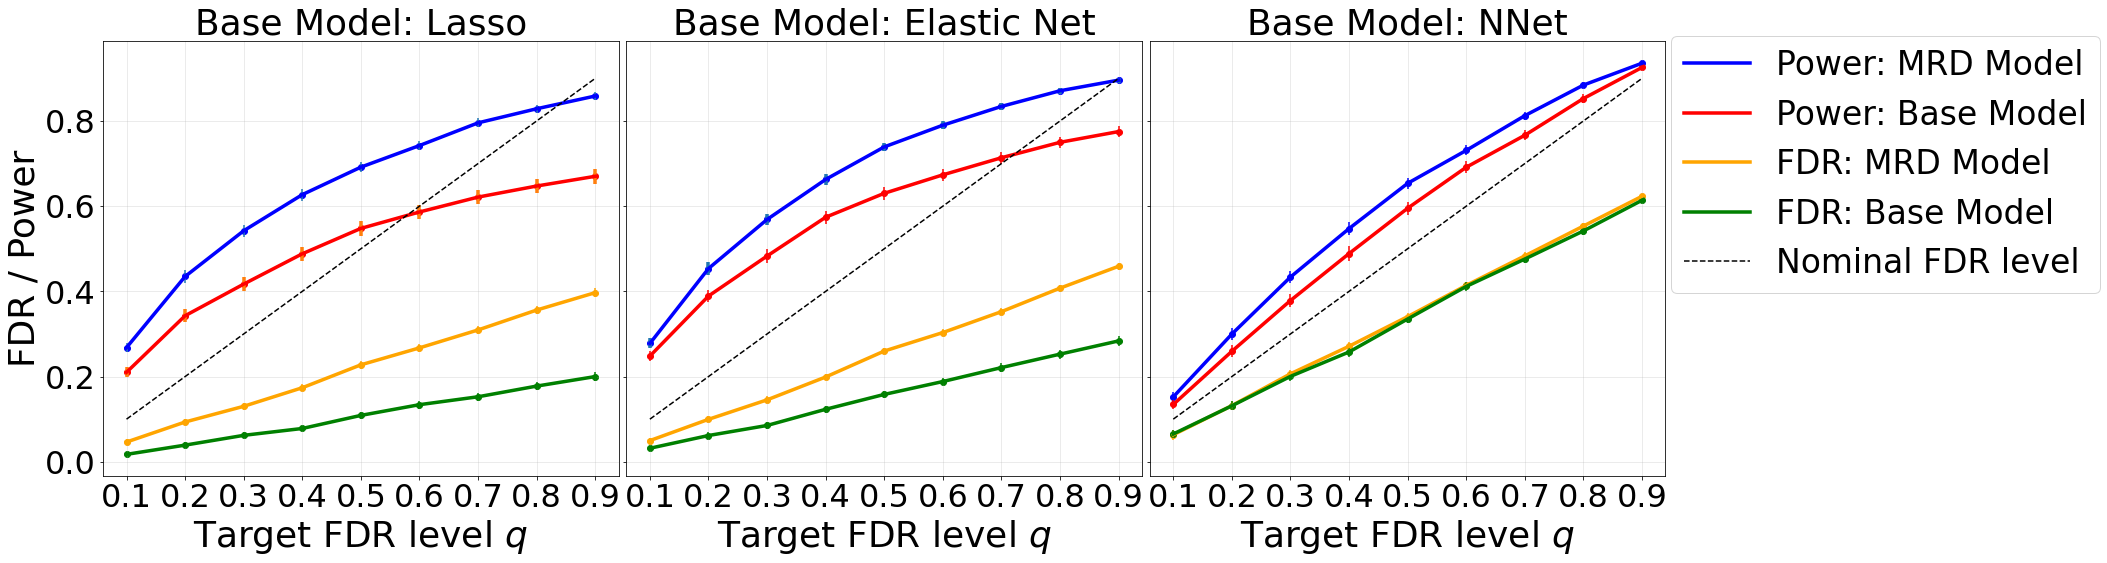

In [ ]:
###################### Power for a varying target FDR level and a constant signal strength #################
from scipy.stats import sem
import pandas as pd
from os import listdir
from os.path import isfile, join
import ast
lw=3.5
th=0.2
ths = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
fz=36
load = True
is_NN = False #'''TODO: fill in whether you produced NN p-vals or not'''
signal_strength_to_eval = 0.14
if load:
    signal_strength=[]
    source = '''TODO: fill in the directory path of which the csvs are'''
    list_files = [join(source, f) for f in listdir(source) if isfile(join(source, f))]
    powers_0 = {};powers_T = {};powers_E = {};powers_ET = {};powers_NN = {};powers_NN_T = {}; 
    fdrs_0 = {};fdrs_T = {};fdrs_E = {};fdrs_ET = {};fdrs_NN = {};fdrs_NN_T = {}; 
    for file in list_files:
        if not 'csv' in file:
            continue
        df = pd.read_csv(file)
        c= df['c'][0]
        if c != signal_strength_to_eval:
            continue
        for th in ths:
            c=th
            if th not in powers_0.keys():
                signal_strength.append(c)
                powers_0[c]=[]; fdrs_0[c]=[]
                powers_T[c]=[]; fdrs_T[c]=[]
                powers_ET[c]=[]; fdrs_ET[c]=[]
                powers_E[c]=[]; fdrs_E[c]=[]
                powers_NN[c]=[]; fdrs_NN[c]=[]
                powers_NN_T[c]=[]; fdrs_NN_T[c]=[]
            ones=df['ones'][0].replace('\n',',').replace('.',',')
            ones=np.array(ast.literal_eval(ones))
            if "NN" in file:
                if not is_NN:
                  continue

                p_vals_NN = ast.literal_eval(df['p_vals_NN'][0])
                disc,_,_,_=multipletests(np.array(p_vals_NN),alpha=th,method='fdr_bh')
                powers_NN[c].append(calc_power(disc,ones))
                fdrs_NN[c].append(calc_FDR(disc,ones))

                p_vals_NN_T = ast.literal_eval(df['p_vals_NN_T'][0])
                disc,_,_,_=multipletests(np.array(p_vals_NN_T),alpha=th,method='fdr_bh')
                powers_NN_T[c].append(calc_power(disc,ones))
                fdrs_NN_T[c].append(calc_FDR(disc,ones))

            else:
                p_vals_T = ast.literal_eval(df['p_vals_T'][0])
                p_vals_0 = ast.literal_eval(df['p_vals_0'][0])
                p_vals_ET = ast.literal_eval(df['p_vals_ET'][0])
                p_vals_E = ast.literal_eval(df['p_vals_E'][0])

                disc,_,_,_=multipletests(np.array(p_vals_T),alpha=th,method='fdr_bh')
                powers_T[c].append(calc_power(disc,ones))
                fdrs_T[c].append(calc_FDR(disc,ones))

                disc,_,_,_=multipletests(np.array(p_vals_0),alpha=th,method='fdr_bh')
                powers_0[c].append(calc_power(disc,ones))
                fdrs_0[c].append(calc_FDR(disc,ones))

                disc,_,_,_=multipletests(np.array(p_vals_ET),alpha=th,method='fdr_bh')
                powers_ET[c].append(calc_power(disc,ones))
                fdrs_ET[c].append(calc_FDR(disc,ones))

                disc,_,_,_=multipletests(np.array(p_vals_E),alpha=th,method='fdr_bh')
                powers_E[c].append(calc_power(disc,ones))
                fdrs_E[c].append(calc_FDR(disc,ones))

        signal_strength=np.sort(signal_strength)
   
pow_T = []; sem_T=[]
pow_0 = []; sem_0=[]
pow_ET = []; sem_ET=[]
pow_E = []; sem_E=[]
pow_NN = []; sem_NN=[]
pow_NN_T = []; sem_NN_T=[]

fdr_T = []; semf_T=[]
fdr_0 = []; semf_0=[]
fdr_ET = []; semf_ET=[]
fdr_E = []; semf_E=[]
fdr_NN = []; semf_NN=[]
fdr_NN_T = []; semf_NN_T=[]




for c in signal_strength:
  pow_T.append(np.mean(powers_T[c]))
  fdr_T.append(np.mean(fdrs_T[c]))
  sem_T.append(sem(powers_T[c]))
  semf_T.append(sem(fdrs_T[c]))

  pow_ET.append(np.mean(powers_ET[c]))
  fdr_ET.append(np.mean(fdrs_ET[c]))
  sem_ET.append(sem(powers_ET[c]))
  semf_ET.append(sem(fdrs_ET[c]))

  pow_0.append(np.mean(powers_0[c]))
  fdr_0.append(np.mean(fdrs_0[c]))
  sem_0.append(sem(powers_0[c]))
  semf_0.append(sem(fdrs_0[c]))

  pow_E.append(np.mean(powers_E[c]))
  fdr_E.append(np.mean(fdrs_E[c]))
  sem_E.append(sem(powers_E[c]))
  semf_E.append(sem(fdrs_E[c]))

  pow_NN.append(np.mean(powers_NN[c]))
  fdr_NN.append(np.mean(fdrs_NN[c]))
  sem_NN.append(sem(powers_NN[c]))
  semf_NN.append(sem(fdrs_NN[c]))

  pow_NN_T.append(np.mean(powers_NN_T[c]))
  fdr_NN_T.append(np.mean(fdrs_NN_T[c]))
  sem_NN_T.append(sem(powers_NN_T[c]))
  semf_NN_T.append(sem(fdrs_NN_T[c]))


fig, (ax1, ax2,ax3) = plt.subplots(1,3,sharey=True,figsize=(28,8),gridspec_kw = {'wspace':0.015})

l1=[];l2=[];l3=[]

l1+=ax1.plot(signal_strength, pow_T, color='blue', label='Power: MRD Lasso',linewidth=lw)
ax1.scatter(signal_strength, pow_T, color='blue')
ax1.errorbar(signal_strength,pow_T,yerr=sem_T, linestyle="None")


l1+=ax1.plot(signal_strength, pow_0, color='red', label='Power: Lasso',linewidth=lw)
ax1.scatter(signal_strength, pow_0, color='red')
ax1.errorbar(signal_strength,pow_0,yerr=sem_0, linestyle="None",linewidth=lw)

    
l3+=ax3.plot(signal_strength, pow_NN_T, color='blue', label='Power: MRD NN',linewidth=lw)
ax3.scatter(signal_strength, pow_NN_T, color='blue')
ax3.errorbar(signal_strength,pow_NN_T,yerr=sem_NN_T,color='blue', linestyle="None")

    
l3+=ax3.plot(signal_strength, pow_NN, color='red', label='Power: NN',linewidth=lw)
ax3.scatter(signal_strength, pow_NN, color='red')
ax3.errorbar(signal_strength,pow_NN,yerr=sem_NN,  color='red',linestyle="None")
    

   
l2+=ax2.plot(signal_strength, pow_ET, color='blue', label='Power: MRD ElasticNet',linewidth=lw)
ax2.scatter(signal_strength, pow_ET, color='blue')
ax2.errorbar(signal_strength,pow_ET,yerr=sem_ET, linestyle="None",linewidth=lw)


l2+=ax2.plot(signal_strength, pow_E, color='red', label='Power: ElasticNet',linewidth=lw)
ax2.scatter(signal_strength, pow_E, color='red')
ax2.errorbar(signal_strength,pow_E,yerr=sem_E,  color='red',linestyle="None")
                 

ax1.set_xlabel("Target FDR level $q$",fontsize=fz)
ax1.set_ylabel("FDR / Power",fontsize=fz);
ax1.grid(alpha=0.3)


l1+=ax1.plot(signal_strength, fdr_T, color='orange', label='FDR: MRD Lasso',linewidth=lw)
ax1.scatter(signal_strength, fdr_T, color='orange')
ax1.errorbar(signal_strength,fdr_T,yerr=semf_T,color='orange', linestyle="None")


l1+=ax1.plot(signal_strength, fdr_0, color='green', label='FDR: Lasso',linewidth=lw)
ax1.scatter(signal_strength, fdr_0, color='green')
ax1.errorbar(signal_strength,fdr_0,yerr=semf_0,color='green', linestyle="None")


l2+=ax2.plot(signal_strength, fdr_ET, color='orange', label='FDR: MRD Elastic Net',linewidth=lw)
ax2.plot(signal_strength, ths, linestyle='dashed', color='black')
ax2.scatter(signal_strength, fdr_ET, color='orange')
ax2.errorbar(signal_strength,fdr_ET,yerr=semf_ET,color='orange', linestyle="None")


l2+=ax2.plot(signal_strength, fdr_E, color='green', label='FDR: Elastic Net',linewidth=lw)
ax2.scatter(signal_strength, fdr_E, color='green')
ax2.errorbar(signal_strength,fdr_E,yerr=semf_E, color='green',linestyle="None")

    
l3+=ax3.plot(signal_strength, fdr_NN_T, color='orange',label="FDR: MRD NN",linewidth=lw)
ax3.scatter(signal_strength, fdr_NN_T, color='orange')
ax3.plot(signal_strength, ths, linestyle='dashed', color='black')
ax3.errorbar(signal_strength,fdr_NN_T,yerr=semf_NN_T, color='orange',linestyle="None")


l3+=ax3.plot(signal_strength, fdr_NN, color='green',label="FDR: NN",linewidth=lw)
ax3.scatter(signal_strength, fdr_NN, color='green')
ax3.errorbar(signal_strength,fdr_NN,yerr=semf_NN, color='green',linestyle="None")

l1+=ax1.plot(signal_strength, ths, linestyle='dashed', color='black') 
leg3=ax3.legend(l1,['Power: MRD Model','Power: Base Model','FDR: MRD Model','FDR: Base Model','Nominal FDR level'],
                fontsize=fz-3,loc=(1.01,.42));

ax1.set_title("Base Model: Lasso",fontsize=fz)
ax2.set_title("Base Model: Elastic Net",fontsize=fz)
ax3.set_title("Base Model: NNet",fontsize=fz)

ax2.set_xlabel("Target FDR level $q$",fontsize=fz)
ax2.set_ylabel("FDR / Power",fontsize=fz);
ax3.set_xlabel("Target FDR level $q$",fontsize=fz)
ax3.set_ylabel("FDR / Power",fontsize=fz);
for tick in ax1.xaxis.get_major_ticks():
    tick.label.set_fontsize(fz-4) 
for tick in ax2.xaxis.get_major_ticks():
    tick.label.set_fontsize(fz-4)
for tick in ax3.xaxis.get_major_ticks():
    tick.label.set_fontsize(fz-4) 
for tick in ax1.yaxis.get_major_ticks():
    tick.label.set_fontsize(fz-4) 
for tick in ax2.yaxis.get_major_ticks():
    tick.label.set_fontsize(fz-4)
for tick in ax3.yaxis.get_major_ticks():
    tick.label.set_fontsize(fz-4) 

ax2.grid(alpha=0.3)

ax3.grid(alpha=0.3)

for ax in fig.get_axes():
    ax.label_outer()
    

# One hypothesis analysis

In [ ]:
from scipy.stats import sem
import pandas as pd
from os import listdir
from os.path import isfile, join
import ast
th=0.05
load = True
# load = False
is_NN = True #'''TODO: fill in whether you produced NN p-vals or not'''
if load:
    signal_strength=[]
    source = '''TODO: fill in the directory path of which the csvs are'''
    list_files = [join(source, f) for f in listdir(source) if isfile(join(source, f))]
    powers_0 = {};powers_T = {};powers_E = {};powers_ET = {};powers_NN = {};powers_NN_T = {};
    for file in list_files:
        if not 'csv' in file:
            continue
        df = pd.read_csv(file)
        c= df['c'][0]
        if c not in powers_0.keys():
            signal_strength.append(c)
            powers_0[c]=[]; fdrs_0[c]=[]
            powers_T[c]=[]; fdrs_T[c]=[]
            powers_ET[c]=[]; fdrs_ET[c]=[]
            powers_E[c]=[]; fdrs_E[c]=[]
            powers_NN[c]=[]; fdrs_NN[c]=[]
            powers_NN_T[c]=[]; fdrs_NN_T[c]=[]

        ones=df['ones'][0].replace('\n',',').replace('.',',')
        ones=np.array(ast.literal_eval(ones))
        id_to_check = ones.nonzero()[0][15]
        if "NN" in file:
            if not is_NN:
              continue
            p_vals_NN = ast.literal_eval(df['p_vals_NN'][0])
            p_vals_NN_T = ast.literal_eval(df['p_vals_NN_T'][0])
            
            powers_NN_T[c].append(1 if p_vals_NN_T[id_to_check]<=th else 0)
            powers_NN[c].append(1 if p_vals_NN[id_to_check]<=th else 0)


        else:
            p_vals_T = ast.literal_eval(df['p_vals_T'][0])
            p_vals_0 = ast.literal_eval(df['p_vals_0'][0])
            p_vals_ET = ast.literal_eval(df['p_vals_ET'][0])
            p_vals_E = ast.literal_eval(df['p_vals_E'][0])
       
            powers_T[c].append(1 if p_vals_T[id_to_check]<=th else 0)
            powers_0[c].append(1 if p_vals_0[id_to_check]<=th else 0)
            powers_ET[c].append(1 if p_vals_ET[id_to_check]<=th else 0)
            powers_E[c].append(1 if p_vals_E[id_to_check]<=th else 0)
    signal_strength=np.sort(signal_strength)
   
pow_T = []; sem_T=[]
pow_0 = []; sem_0=[]
pow_ET = []; sem_ET=[]
pow_E = []; sem_E=[]
pow_NN = []; sem_NN=[]
pow_NN_T = []; sem_NN_T=[]




for c in signal_strength:
  pow_T.append(np.mean(powers_T[c]))

  pow_ET.append(np.mean(powers_ET[c]))

  pow_0.append(np.mean(powers_0[c]))

  pow_E.append(np.mean(powers_E[c]))

  pow_NN.append(np.mean(powers_NN[c]))

  pow_NN_T.append(np.mean(powers_NN_T[c]))

fig, (ax1, ax2, ax3) = plt.subplots(1,3,sharey=True,figsize=(24,8),gridspec_kw = {'wspace':0.015})



l1=[];l2=[];l3=[]

l1+=ax1.plot(signal_strength, pow_T, color='blue', label='Power: MRD Lasso')
ax1.scatter(signal_strength, pow_T, color='blue')

l1+=ax1.plot(signal_strength, pow_0, color='red', label='Power: Lasso')
ax1.scatter(signal_strength, pow_0, color='red')

   
l2+=ax2.plot(signal_strength, pow_ET, color='blue', label='Power: MRD ElasticNet')
ax2.scatter(signal_strength, pow_ET, color='blue')


l2+=ax2.plot(signal_strength, pow_E, color='red', label='Power: ElasticNet')
ax2.scatter(signal_strength, pow_E, color='red')

                
l3+=ax3.plot(signal_strength, pow_NN_T, color='blue', label='Power: MRD NN')
ax3.scatter(signal_strength, pow_NN_T, color='blue')

l3+=ax3.plot(signal_strength, pow_NN, color='red', label='Power: NN')
ax3.scatter(signal_strength, pow_NN, color='red')

ax1.set_xlabel("Signal amplitude",fontsize=22)
ax1.set_ylabel("Power of a single feature, $\\alpha={}$".format(th),fontsize=22);
ax1.grid(alpha=0.3)

leg1=ax1.legend(l1,['MRD model','Base Model'],fontsize=22);    

ax2.set_xlabel("Signal amplitude",fontsize=22)
ax3.set_xlabel("Signal amplitude",fontsize=22)
ax2.set_ylabel("Power of a single feature, $\\alpha={}$".format(th),fontsize=22);

for tick in ax1.xaxis.get_major_ticks():
    tick.label.set_fontsize(20) 
for tick in ax2.xaxis.get_major_ticks():
    tick.label.set_fontsize(20)
for tick in ax3.xaxis.get_major_ticks():
    tick.label.set_fontsize(20)
for tick in ax1.yaxis.get_major_ticks():
    tick.label.set_fontsize(20) 
for tick in ax2.yaxis.get_major_ticks():
    tick.label.set_fontsize(20)
for tick in ax3.yaxis.get_major_ticks():
    tick.label.set_fontsize(20)

ax2.grid(alpha=0.3)
ax3.grid(alpha=0.3)
ax1.set_title("Base Model: Lasso",fontsize=22)
ax2.set_title("Base Model: ElasticNet",fontsize=22)
ax3.set_title("Base Model: NNet",fontsize=22)


for ax in fig.get_axes():
    ax.label_outer()


# Real data analysis

In [122]:
from os import listdir
from os.path import isfile, join
import ast
ths=[0.05,0.1,0.2,0.3,.4,.5,.6,.7,.8,.9]
load = True
p=150
if load:
    signal_strength=[]
    source = '''TODO: fill in the directory path of which the csvs are'''
    list_files = [join(source, f) for f in listdir(source) if isfile(join(source, f))]
    list_files = np.sort(list_files)
    
    discs_ET = np.zeros(p);discs_E = np.zeros(p)
    mean_sum_T = []; mean_sum_0 = []; mean_sum_ET = []; mean_sum_E = []
    for i in range(len(ths)):
        mean_sum_T.append([]); mean_sum_0.append([]); mean_sum_ET.append([]); mean_sum_E.append([])
    for file in list_files:
        if not 'csv' in file:
            continue
        df = pd.read_csv(file)
        seed = int(df['seed'][0])
        
        
        p_vals_T = ast.literal_eval(df['p_vals_T'][0])
        p_vals_0 = ast.literal_eval(df['p_vals_0'][0])
        p_vals_ET = ast.literal_eval(df['p_vals_ET'][0])
        p_vals_E = ast.literal_eval(df['p_vals_E'][0])
        
        for i,th in enumerate(ths):
            sums_E = []; sums_ET=[]; sums_0 = []; sums_T=[]
            disc_ET,_,_,_=multipletests(np.array(p_vals_ET),alpha=th,method='fdr_bh')
            disc_E,_,_,_=multipletests(np.array(p_vals_E),alpha=th,method='fdr_bh')
            disc_T,_,_,_=multipletests(np.array(p_vals_T),alpha=th,method='fdr_bh')
            disc_0,_,_,_=multipletests(np.array(p_vals_0),alpha=th,method='fdr_bh')
            mean_sum_T[i].append(disc_T.sum());
            mean_sum_0[i].append(disc_0.sum());
            mean_sum_ET[i].append(disc_ET.sum());
            mean_sum_E[i].append(disc_E.sum());


T_to_plot=[]
l_to_plot=[]
ET_to_plot=[]
E_to_plot=[]
fz=30
lw=3
sem_0 = []; sem_T = []; sem_ET = []; sem_E = [];
for i in range(len(ths)):
    T_to_plot.append( np.mean(mean_sum_T[i]))
    l_to_plot.append( np.mean(mean_sum_0[i]))
    ET_to_plot.append( np.mean(mean_sum_ET[i]))
    E_to_plot.append( np.mean(mean_sum_E[i]))
    
    sem_T.append( sem(mean_sum_T[i]))
    sem_0.append( sem(mean_sum_0[i]))
    sem_ET.append( sem(mean_sum_ET[i]))
    sem_E.append( sem(mean_sum_E[i]))
    
to_show=4
fig,ax=plt.subplots(1, 1, figsize = (15,10))
ax.errorbar(ths[:to_show],T_to_plot[:to_show],yerr=sem_T[:to_show],color='blue')
ax.errorbar(ths[:to_show],ET_to_plot[:to_show],yerr=sem_ET[:to_show],color='green')
ax.errorbar(ths[:to_show],E_to_plot[:to_show],yerr=sem_E[:to_show],color='orange');
ax.errorbar(ths[:to_show],l_to_plot[:to_show],yerr=sem_0[:to_show],color='red')

ax.plot(ths[:to_show],T_to_plot[:to_show],marker='.',label='MRD Lasso',color='blue',linewidth=lw)
ax.plot(ths[:to_show],ET_to_plot[:to_show],marker='.',label='MRD Elastic Net',color='green',linewidth=lw)
ax.plot(ths[:to_show],E_to_plot[:to_show],marker='.',label='Elastic Net',color='orange',linewidth=lw);
ax.plot(ths[:to_show],l_to_plot[:to_show],marker='.',label='Lasso',color='red',linewidth=lw)
ax.grid(alpha=0.3)
ax.set_xlabel("Target FDR level $q$",fontsize=fz+2)#,weight='bold')
ax.set_ylabel("Average number of discoveries",fontsize=fz+2)#,weight='bold')
ax.set_xticks(ths[1:to_show])
ax.legend(fontsize=fz+3);

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(fz) 

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(fz)

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'TODO: fill in the directory path'